In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [43]:
data = pd.read_csv('../raw_data/xy_hc_fai_tstp_E2_1_AM.csv')
data.head()

,Item1.Item1,Item1.Item2,Item1.Item3,Item1.Item4,Item1.Item5.Item1,Item1.Item5.Item2,Item1.Item5.Item3,Item1.Item6,Item2.Item1,Item2.Item2
0,892.4875,267.6579,2.699531,2.699531,130.0,4.830271,True,5,1.0,2
1,892.5435,267.6642,2.698462,2.698462,130.0,4.830271,True,9,1.0,2
2,892.5745,267.6212,2.695414,2.695414,65.0,10.252979,True,19,1.0,2
3,892.5025,267.6250,2.697424,2.697424,65.0,10.252979,True,23,1.0,2
4,892.5617,267.6482,2.697159,2.697159,65.0,10.252979,True,26,1.0,2


In [44]:
data.columns = ['X_coord', 'Y_coord', 'heading_direction', \
                'cumulative_direction','beat_freq', 'beat_amp', \
                'tail_move?', 'timestamp', 'contrast_level', 'flow_direction']

In [45]:
data.head()

,X_coord,Y_coord,heading_direction,cumulative_direction,beat_freq,beat_amp,tail_move?,timestamp,contrast_level,flow_direction
0,892.4875,267.6579,2.699531,2.699531,130.0,4.830271,True,5,1.0,2
1,892.5435,267.6642,2.698462,2.698462,130.0,4.830271,True,9,1.0,2
2,892.5745,267.6212,2.695414,2.695414,65.0,10.252979,True,19,1.0,2
3,892.5025,267.6250,2.697424,2.697424,65.0,10.252979,True,23,1.0,2
4,892.5617,267.6482,2.697159,2.697159,65.0,10.252979,True,26,1.0,2


In [46]:
data['contrast_level'].unique()

array([1.  , 0.  , 0.01, 0.1 , 0.3 , 0.5 , 0.7 , 0.2 ])

In [47]:
def divide_data_by_flow_direction(data):
    flow_to_right = pd.DataFrame(data[data.flow_direction == 1])
    flow_to_left = pd.DataFrame(data[data.flow_direction == 2])
    return flow_to_right, flow_to_left

In [48]:
def divide_data_by_contrast(data):
    C_0 = pd.DataFrame(data[data.contrast_level == 0])
    C_01 = pd.DataFrame(data[data.contrast_level == 0.01])
    C_1 = pd.DataFrame(data[data.contrast_level == 0.1])
    C_2 = pd.DataFrame(data[data.contrast_level == 0.2])
    C_3 = pd.DataFrame(data[data.contrast_level == 0.3])
    C_5 = pd.DataFrame(data[data.contrast_level == 0.5])
    C_7 = pd.DataFrame(data[data.contrast_level == 0.7])
    C_10 = pd.DataFrame(data[data.contrast_level == 1])
    return C_0, C_01, C_1, C_2, C_3, C_5, C_7, C_10

In [49]:
flow_to_right, flow_to_left = divide_data_by_flow_direction(data)

In [50]:
C0, C01, C1, C2, C3, C5, C7, C10 = divide_data_by_contrast(flow_to_left)

In [61]:
C10.head()

,X_coord,Y_coord,heading_direction,cumulative_direction,beat_freq,beat_amp,tail_move?,timestamp,contrast_level,flow_direction
0,892.4875,267.6579,2.699531,2.699531,130.0,4.830271,True,5,1.0,2
1,892.5435,267.6642,2.698462,2.698462,130.0,4.830271,True,9,1.0,2
2,892.5745,267.6212,2.695414,2.695414,65.0,10.252979,True,19,1.0,2
3,892.5025,267.6250,2.697424,2.697424,65.0,10.252979,True,23,1.0,2
4,892.5617,267.6482,2.697159,2.697159,65.0,10.252979,True,26,1.0,2


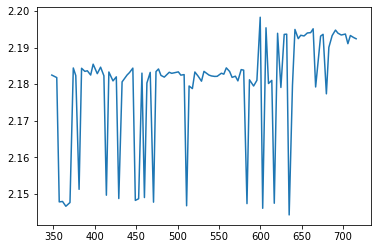

In [62]:
plt.plot(C3['timestamp'].head(100),C3['heading_direction'].head(100))

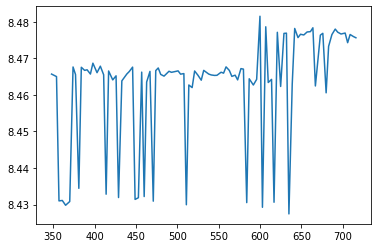

In [63]:
plt.plot(C3['timestamp'].head(100),C3['cumulative_direction'].head(100))